In [2]:
import pandas as pd
import pandas_gbq as gbq 

In [14]:
sql = """
    SELECT *
    FROM `gdelt-bq.full.events` 
    WHERE Actor1CountryCode = 'UKR'
    AND MonthYear >= 201402
"""

# news_df = gbq.read_gbq(sql, project_id='cs498css')
news_df = pd.read_csv('../temp/god_save_us2.csv')

/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_40084/2776920811.py:9: DtypeWarning: Columns (12,15,22,25,49) have mixed types. Specify dtype option on import or set low_memory=False.
  news_df = pd.read_csv('../temp/god_save_us2.csv')


In [15]:
news_df

,Unnamed: 0,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,DATE,WeightedTone,WeightedGoldstein
0,0,1072993533,20221121,202211,2022,2022.8795,UKR,UKRAINIAN,UKR,NaN,...,AF,AF,33.0000,66.0000,AF,20221121,https://www.marinelink.com/news/amazon-model-g...,2022-11-21,-8.682171,12.0
1,1,1072944770,20221121,202211,2022,2022.8795,UKR,UKRAINE,UKR,NaN,...,UP,UP05,48.7539,38.0820,-1052105,20221121,https://www.nytimes.com/live/2022/11/20/world/...,2022-11-21,-5.500161,-2.0
2,2,1055444045,20220723,202207,2022,2022.5562,UKR,UKRAINE,UKR,NaN,...,UP,UP12,50.4333,30.5167,-1044367,20220723,http://www.arabtimesonline.com/news/kuwait-wel...,2022-07-23,-7.505212,38.4
3,3,1055830959,20220726,202207,2022,2022.5644,UKR,UKRAINIAN,UKR,NaN,...,CA,CA08,45.4167,-75.7000,-570760,20220726,https://menafn.com/1104595491/Putins-Gas-War-O...,2022-07-26,-27.826087,-16.0
4,4,1055827145,20220726,202207,2022,2022.5644,UKR,UKRAINE,UKR,NaN,...,UP,UP17,46.4639,30.7386,-1049092,20220726,https://www.newagebd.net/article/176886/eu-to-...,2022-07-26,-26.436685,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046682,4046682,881284151,20191021,201910,2019,2019.7973,UKR,UKRAINE,UKR,NaN,...,US,USDC,38.8951,-77.0364,531871,20191021,https://www.cnsnews.com/news/article/melanie-a...,2019-10-21,8.411215,20.8
4046683,4046683,881876272,20191024,201910,2019,2019.8055,UKRGOV,UKRAINE,UKR,NaN,...,US,USDC,38.8951,-77.0364,531871,20191024,https://mynorthwest.com/1565952/current-former...,2019-10-24,0.988040,0.0
4046684,4046684,882110136,20191025,201910,2019,2019.8082,UKR,UKRAINE,UKR,NaN,...,US,USDC,38.8951,-77.0364,531871,20191025,https://www.alternet.org/2019/10/the-gop-is-de...,2019-10-25,-13.741598,-8.0
4046685,4046685,881808063,20191023,201910,2019,2019.8027,UKR,UKRAINE,UKR,NaN,...,US,USDC,38.8951,-77.0364,531871,20191023,https://www.pri.org/stories/2019-10-23/ukraine...,2019-10-23,-9.276228,-22.4


In [16]:
news_df[['Actor1Code', 'Actor2Code', 'ActionGeo_FullName', 'GoldsteinScale', 'AvgTone', 'EventCode']]

,Actor1Code,Actor2Code,ActionGeo_FullName,GoldsteinScale,AvgTone,EventCode
0,UKR,USA,Afghanistan,3.0,-2.170543,20
1,UKR,RUS,"Rozdolivka, Donets'ka Oblast', Ukraine",-2.0,-5.500161,110
2,UKR,RUS,"Kyiv, Kyyiv, Misto, Ukraine",6.4,-1.250869,61
3,UKR,CAN,"Ottawa, Ontario, Canada",-4.0,-6.956522,120
4,UKR,RUS,"Odessa, Odes'ka Oblast, Ukraine",-10.0,-2.403335,194
...,...,...,...,...,...,...
4046682,UKR,USA,"White House, District of Columbia, United States",5.2,2.102804,31
4046683,UKRGOV,UKR,"White House, District of Columbia, United States",0.0,0.247010,10
4046684,UKR,GOV,"White House, District of Columbia, United States",-2.0,-3.435400,110
4046685,UKR,MIL,"White House, District of Columbia, United States",-5.6,-2.319057,162


In [18]:
ukr_rus_conflict_df = news_df#.str.startswith('19')]
ukr_rus_conflict_df[['Actor1Code', 'Actor2Code', 'ActionGeo_FullName', 'GoldsteinScale', 'AvgTone', 'EventCode']]

,Actor1Code,Actor2Code,ActionGeo_FullName,GoldsteinScale,AvgTone,EventCode
0,UKR,USA,Afghanistan,3.0,-2.170543,20
1,UKR,RUS,"Rozdolivka, Donets'ka Oblast', Ukraine",-2.0,-5.500161,110
2,UKR,RUS,"Kyiv, Kyyiv, Misto, Ukraine",6.4,-1.250869,61
3,UKR,CAN,"Ottawa, Ontario, Canada",-4.0,-6.956522,120
4,UKR,RUS,"Odessa, Odes'ka Oblast, Ukraine",-10.0,-2.403335,194
...,...,...,...,...,...,...
4046682,UKR,USA,"White House, District of Columbia, United States",5.2,2.102804,31
4046683,UKRGOV,UKR,"White House, District of Columbia, United States",0.0,0.247010,10
4046684,UKR,GOV,"White House, District of Columbia, United States",-2.0,-3.435400,110
4046685,UKR,MIL,"White House, District of Columbia, United States",-5.6,-2.319057,162


In [20]:
us_aid_df = pd.read_csv("../temp/us_foreign_aid_complete.csv")

/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_40084/390734651.py:1: DtypeWarning: Columns (6,7,12,48) have mixed types. Specify dtype option on import or set low_memory=False.
  us_aid_df = pd.read_csv("../temp/us_foreign_aid_complete.csv")


In [21]:
us_aid_df.head()

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2,Obligations,2006,01MAR2006,37760,52794,13,Technical Cooperation - Other,.,30831
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01MAR2006,983,1374,13,Technical Cooperation - Other,.,30831
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01MAY2006,3392,4742,13,Technical Cooperation - Other,.,30831
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01JUL2006,5001,6992,13,Technical Cooperation - Other,.,30831
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01AUG2006,4257,5952,13,Technical Cooperation - Other,.,30831


In [22]:
us_ukraine_aid_df = us_aid_df[us_aid_df['Country Code'] == 'UKR']
us_ukraine_aid_df.head()

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
2452676,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2019,01JUN2019,18438,20650,8,Project-type interventions - not Investment Re...,7999259,62590
2452677,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2019,01JUN2019,18438,20650,8,Project-type interventions - not Investment Re...,7999259,62590
2452678,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2017,01MAR2017,9950,11629,8,Project-type interventions - not Investment Re...,.,51839
2452679,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2019,01JAN2019,72240,80907,8,Project-type interventions - not Investment Re...,.,51839
2452680,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2019,01MAY2019,-1442,-1615,8,Project-type interventions - not Investment Re...,.,51839


In [23]:
us_ukraine_aid_df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

In [38]:
us_ukr_conf_aid = us_ukraine_aid_df 
# [((us_ukraine_aid_df['US Sector Name'] == 'Conflict Mitigation and Reconciliation') 
#                   | (us_ukraine_aid_df['US Sector Name'] == 'Combating Weapons of Mass Destruction (WMD)')
#                   | (us_ukraine_aid_df['US Sector Name'] == 'Counter-Terrorism')
#                   | (us_ukraine_aid_df['US Sector Name'] == 'Peace and Security - General')
#                   | (us_ukraine_aid_df['US Sector Name'] == 'Humanitarian Assistance - General')) & (us_ukraine_aid_df['Transaction Date'] > '02FEB2014')]

In [39]:
us_ukraine_aid_df['Transaction Date'].unique()

array(['01JUN2019', '01MAR2017', '01JAN2019', ..., '31DEC2013',
       '31MAR2014', '30JUN2014'], dtype=object)

In [40]:
print(us_ukraine_aid_df['US Sector ID'].unique())
us_ukraine_aid_df['US Sector Name'].unique()

[41 37 38  8  6 11 22 23  9 29  7 21 28 15 12 16 17 10  5 27 30 31 26 36
 24 35 42 20 14 18 25  2 48 50 47  3 45 52 39 46  1 44 32 43  4 51 49 34
 33]


array(['Direct Administrative Costs',
       'Protection, Assistance and Solutions', 'Disaster Readiness',
       'Good Governance', 'Conflict Mitigation and Reconciliation',
       'HIV/AIDS', 'Policies, Regulations, and Systems',
       'Social Services', 'Political Competition and Consensus-Building',
       'Agriculture', 'Rule of Law and Human Rights', 'Higher Education',
       'Infrastructure', 'Other Public Health Threats', 'Tuberculosis',
       'Maternal and Child Health',
       'Family Planning and Reproductive Health', 'Civil Society',
       'Transnational Crime', 'Financial Sector',
       'Private Sector Competitiveness', 'Economic Opportunity',
       'Trade and Investment', 'Clean Productive Environment',
       'Social Assistance', 'Natural Resources and Biodiversity',
       'Monitoring and Evaluation', 'Basic Education',
       'Pandemic Influenza and Other Emerging Threats (PIOET)',
       'Water Supply and Sanitation',
       'Macroeconomic Foundation for Growth'

In [41]:
print(us_ukraine_aid_df['International Sector Code'].unique())
us_ukraine_aid_df['International Sector Name'].unique()

[430 720 740 911 912 913 151 152 134 160 122 520 114 230 121 130 210 240
 250 321 331 310 410 111 123 112 113 140 998 730 322 220]


array(['Other Multisector', 'Emergency Response',
       'Disaster Prevention and Preparedness', 'Operating Expenses',
       'Program Design and Learning', 'Administration and Oversight',
       'Government and Civil Society', 'Conflict, Peace, and Security',
       'HIV/AIDS', 'Other Social Infrastructure and Services',
       'Basic Health', 'Developmental Food Aid/Food Security Assistance',
       'Post-Secondary Education', 'Energy', 'Health, General',
       'Maternal and Child Health, Family Planning',
       'Transport and Storage', 'Banking and Financial Services',
       'Business and Other Services', 'Industry',
       'Trade Policy and Regulations', 'Agriculture',
       'General Environmental Protection', 'Education, Level Unspecified',
       'Non-communicable diseases (NCDs)', 'Basic Education',
       'Upper Secondary Education', 'Water Supply and Sanitation',
       'Unallocated/ Unspecified',
       'Reconstruction Relief and Rehabilitation',
       'Mineral Resources

In [42]:
print(us_ukraine_aid_df['Activity ID'].unique())
us_ukraine_aid_df['Activity Name'].unique()

[217880 207129 205819 ...  25161 295851 297294]


array(['E&E Cost Recovery-funded IT - 2019',
       'USAID Travel and Transportation',
       'USAID Advisory and Assistance Services',
       'USAID Communications, Utilities, and Rental Payments',
       'USAID Miscellaneous Goods, Services, and Operations Maintanence',
       'USAID Pay and Benefits', 'Administrative costs',
       'USAID Equipment, Lands, and Structures',
       'Disaster Assistance Support Program (DASP) PASA with USAID/OFDA and USFS.',
       'Municipal Finance Strengthening Initiative Roll-out Program (MFSI-II)',
       'UKR SO 3.28 HIV Transmission',
       'UKR SO 3.28 HIV Transmission - Assistance for HIV/AIDS',
       'Targeted Vulnerable Populations', 'Social Services',
       'Protection, Assistance and Solutions',
       'Strengthening Political Processes in Ukraine (SPPU) Program',
       'Ukraine Electoral Law Reform Program', 'Ukraine Media Project',
       'Ukraine Responsive and Accountable Politics Program (U-RAP)',
       'Systems for Improved Acce

In [43]:
print(us_ukraine_aid_df['Foreign Assistance Objective ID'].unique())
us_ukraine_aid_df['Foreign Assistance Objective Name'].unique()

[1 2]


array(['Economic', 'Military'], dtype=object)

In [44]:
news_df[['Actor1Code', 'Actor2Code', 'ActionGeo_FullName', 'GoldsteinScale', 'AvgTone', 'EventCode']]

,Actor1Code,Actor2Code,ActionGeo_FullName,GoldsteinScale,AvgTone,EventCode
0,UKR,USA,Afghanistan,3.0,-2.170543,20
1,UKR,RUS,"Rozdolivka, Donets'ka Oblast', Ukraine",-2.0,-5.500161,110
2,UKR,RUS,"Kyiv, Kyyiv, Misto, Ukraine",6.4,-1.250869,61
3,UKR,CAN,"Ottawa, Ontario, Canada",-4.0,-6.956522,120
4,UKR,RUS,"Odessa, Odes'ka Oblast, Ukraine",-10.0,-2.403335,194
...,...,...,...,...,...,...
4046682,UKR,USA,"White House, District of Columbia, United States",5.2,2.102804,31
4046683,UKRGOV,UKR,"White House, District of Columbia, United States",0.0,0.247010,10
4046684,UKR,GOV,"White House, District of Columbia, United States",-2.0,-3.435400,110
4046685,UKR,MIL,"White House, District of Columbia, United States",-5.6,-2.319057,162


In [30]:
print(us_ukraine_aid_df['Transaction Type ID'].unique())
us_ukraine_aid_df['Transaction Type Name'].unique()

[2 3]


array(['Obligations', 'Disbursements'], dtype=object)

In [31]:
print(us_ukraine_aid_df['aid_type_id'].unique())
us_ukraine_aid_df['aid_type_name'].unique()

[ 8 17 11 13 12  6 23 10  3  5]


array(['Project-type interventions - not Investment Related',
       'Administrative costs not included elsewhere',
       'Technical Cooperation - Donor country personnel',
       'Technical Cooperation - Other',
       'Technical Cooperation - Investment Related',
       'Contributions to specific-purpose programmes and funds managed by international organisations',
       'Core contributions to multilateral institutions',
       'Project-type interventions - Investment Related',
       'Core support to NGOs, other private bodies, PPPs and research institutes',
       'Core contributions to multilateral institutions - capital subscriptions'],
      dtype=object)

In [32]:
news_df.columns

Index(['Unnamed: 0', 'GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year',
       'FractionDate', 'Actor1Code', 'Actor1Name', 'Actor1CountryCode',
       'Actor1KnownGroupCode', 'Actor1EthnicCode', 'Actor1Religion1Code',
       'Actor1Religion2Code', 'Actor1Type1Code', 'Actor1Type2Code',
       'Actor1Type3Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
       'Actor2KnownGroupCode', 'Actor2EthnicCode', 'Actor2Religion1Code',
       'Actor2Religion2Code', 'Actor2Type1Code', 'Actor2Type2Code',
       'Actor2Type3Code', 'IsRootEvent', 'EventCode', 'EventBaseCode',
       'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions',
       'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type',
       'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_Lat', 'Actor2Geo_Long',
       'Actor2Ge

In [33]:
news_df.head()
news_df['DATE'] = pd.to_datetime(news_df['SQLDATE'], format='%Y%m%d')
news_df['DATE'].head()

0   2022-11-21
1   2022-11-21
2   2022-07-23
3   2022-07-26
4   2022-07-26
Name: DATE, dtype: datetime64[ns]

In [34]:
ukr_rus_conflict_df['DATE'] = pd.to_datetime(ukr_rus_conflict_df['SQLDATE'], format='%Y%m%d')
ukr_rus_conflict_df['DATE'].min()

Timestamp('2014-02-01 00:00:00')

In [45]:
from datetime import datetime
import pandas as pd
from datetime import datetime
us_ukr_conf_aid['Transaction Date'] = pd.to_datetime(us_aid_df['Transaction Date'])
us_ukr_conf_aid = us_ukr_conf_aid[us_ukr_conf_aid['Transaction Date'] > datetime(2014, 2, 20)]
us_ukr_conf_aid['Transaction Date'].max()


/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_40084/1142265917.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_ukr_conf_aid['Transaction Date'] = pd.to_datetime(us_aid_df['Transaction Date'])
/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_40084/1142265917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_ukr_conf_aid['Transaction Date'] = pd.to_datetime(us_aid_df['Transaction Date'])


Timestamp('2023-09-30 00:00:00')

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [47]:
news_df[['GLOBALEVENTID', 'DATE', 'AvgTone', 'GoldsteinScale', 'EventCode', 'NumArticles', 'NumMentions']]

,GLOBALEVENTID,DATE,AvgTone,GoldsteinScale,EventCode,NumArticles,NumMentions
0,1072993533,2022-11-21,-2.170543,3.0,20,4,4
1,1072944770,2022-11-21,-5.500161,-2.0,110,1,1
2,1055444045,2022-07-23,-1.250869,6.4,61,6,6
3,1055830959,2022-07-26,-6.956522,-4.0,120,4,4
4,1055827145,2022-07-26,-2.403335,-10.0,194,11,11
...,...,...,...,...,...,...,...
4046682,881284151,2019-10-21,2.102804,5.2,31,4,4
4046683,881876272,2019-10-24,0.247010,0.0,10,4,4
4046684,882110136,2019-10-25,-3.435400,-2.0,110,4,4
4046685,881808063,2019-10-23,-2.319057,-5.6,162,4,4


US Aid Total ~ Country + Crisis Topic + News Coverage (Quantitative + Qualititative) + Year

In [48]:
ukr_rus_conflict_df['DATE']

0         2022-11-21
1         2022-11-21
2         2022-07-23
3         2022-07-26
4         2022-07-26
             ...    
4046682   2019-10-21
4046683   2019-10-24
4046684   2019-10-25
4046685   2019-10-23
4046686   2019-10-29
Name: DATE, Length: 4046687, dtype: datetime64[ns]

In [49]:
us_ukr_conf_aid['Transaction Date']

2452676   2019-06-01
2452677   2019-06-01
2452678   2017-03-01
2452679   2019-01-01
2452680   2019-05-01
             ...    
2490932   2016-09-30
2490933   2016-09-30
2490934   2016-09-30
2490935   2016-09-30
2490938   2022-12-08
Name: Transaction Date, Length: 23671, dtype: datetime64[ns]

In [50]:
ukr_rus_conflict_df['WeightedTone'] = ukr_rus_conflict_df['AvgTone'] * ukr_rus_conflict_df['NumMentions']
ukr_rus_conflict_df['WeightedGoldstein'] = ukr_rus_conflict_df['GoldsteinScale'] * ukr_rus_conflict_df['NumMentions']
model_df = us_ukr_conf_aid[['Constant Dollar Amount', 'Transaction Date']]

model_df['WeightedTone'] = ukr_rus_conflict_df[ukr_rus_conflict_df['DATE'] < us_ukr_conf_aid['Transaction Date']]['WeightedTone'].agg('sum')
# .join(ukr_rus_conflict_df[ukr_rus_conflict_df['DATE'] < us_ukr_conf_aid['Transaction Date']].aggregate({'AvgTone': 'mean', 'WeightedTone': 'sum', 'GoldsteinScale': 'mean', 'WeightedGoldstein': 'sum', 'NumMentions': 'sum', 'NumArticles': 'sum'}))

news_df[['DATE', 'AvgTone', 'GoldsteinScale']]
model = smf.ols(formula='ratio ~ C(time_of_day) + weekday',data=df_sim)

ValueError: Can only compare identically-labeled Series objects

In [51]:
import pandas as pd
from datetime import timedelta

us_ukr_conf_aid.reset_index()

sub_df = pd.DataFrame(columns = ['AvgTone', 'WeightedTone', 'GoldsteinScale', 'WeightedGoldstein', 'NumMentions', 'NumArticles'])

for index, row in us_ukr_conf_aid.iterrows():
    t_date = row['Transaction Date']
    sub_df.loc[len(sub_df)] = ukr_rus_conflict_df[(ukr_rus_conflict_df['DATE'] < t_date) & (ukr_rus_conflict_df['DATE'] > t_date - timedelta(days=90))].agg({'AvgTone': 'mean', 'WeightedTone': 'sum', 'GoldsteinScale': 'mean', 'WeightedGoldstein': 'sum', 'NumMentions': 'sum', 'NumArticles': 'sum'})


# sub_df['Transaction Date'] = us_ukr_conf_aid['Transaction Date']
# sub_df['Dollar Amount'] = us_ukr_conf_aid['Constant Dollar Amount']


KeyboardInterrupt: 

In [ ]:
sub_df['Transaction Date'] = pd.Series()
sub_df['Dollar Amount'] = pd.Series()

In [ ]:
i = 0
for index, row in us_ukr_conf_aid.iterrows():
    t_date = row['Transaction Date']
    d_amount = row['Constant Dollar Amount']
    sub_df.at[i, 'Transaction Date'] = t_date
    sub_df.at[i, 'Dollar Amount'] = d_amount
    i += 1

In [89]:
us_ukr_conf_aid['Constant Dollar Amount']

2483615    11238798
2483616    11238798
2483617     4063619
2483618     4063619
2483619        5346
             ...   
2489589      175195
2489593       49002
2489597     1417878
2489603    30250884
2489605     2077252
Name: Constant Dollar Amount, Length: 213, dtype: int64

In [90]:
sub_df
sub_df['DA'] = sub_df['Dollar Amount'].astype(float)

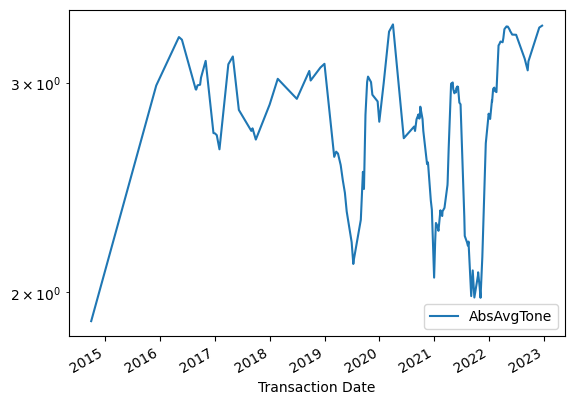

In [91]:
# Give me visualizaions for sub_df, tone, dollar amount, mentions, by date

import matplotlib.pyplot as plt

sub_df['AvgTone'] = sub_df['AvgTone'].astype(float)
sub_df['AbsAvgTone'] = abs(sub_df['AvgTone'])
sub_df['GoldsteinScale'] = sub_df['GoldsteinScale'].astype(float)
sub_df['NumMentions'] = sub_df['NumMentions'].astype(float)
sub_df['NumArticles'] = sub_df['NumArticles'].astype(float)

sub_df.plot(x='Transaction Date', y='AbsAvgTone',logy=True, kind='line')
plt.show()

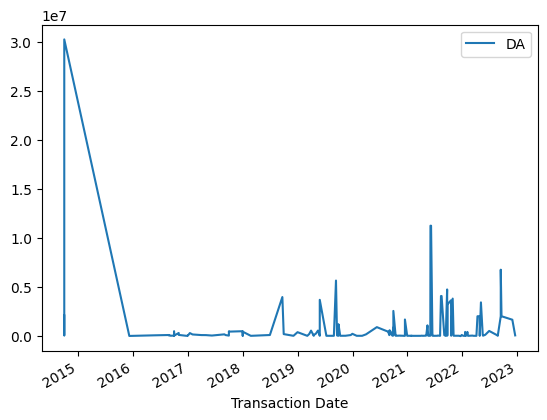

In [92]:
sub_df.plot(x='Transaction Date', y='DA', kind='line')
plt.show()

<Axes: xlabel='Sum of Goldstein Scale Scores of Events in the 90 days before Aid Allocation', ylabel='Dollar Amount of Aid (Adjusted for Inflation)'>

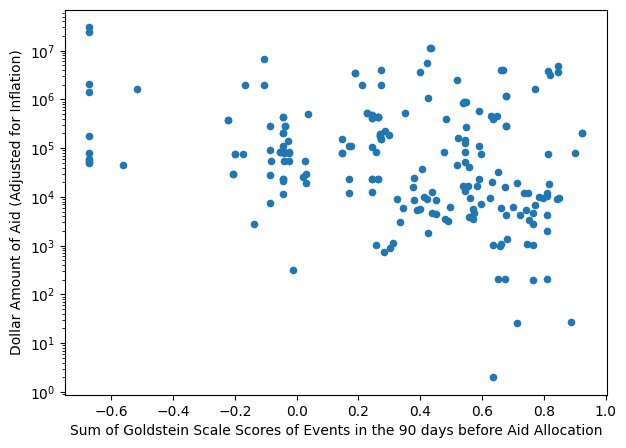

In [126]:
sub_df.plot(x='GoldsteinScale', y = 'DA', kind='scatter', logy = True, xlabel = "Sum of Goldstein Scale Scores of Events in the 90 days before Aid Allocation", ylabel = "Dollar Amount of Aid (Adjusted for Inflation)", figsize = (7, 5))

In [94]:
import matplotlib.pyplot as plt

<Axes: xlabel='Number of Articles in the 90 days before Aid Allocation', ylabel='Dollar Amount of Aid (Adjusted for Inflation)'>

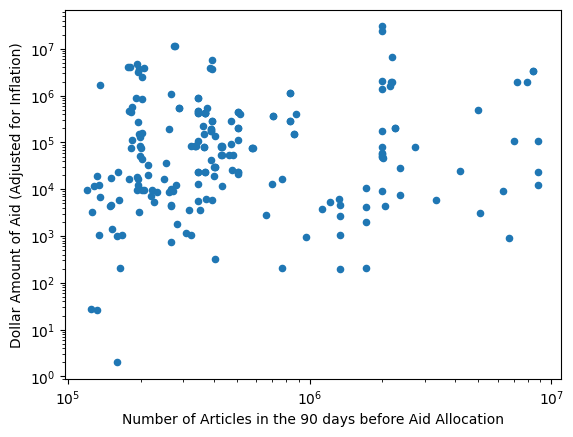

In [118]:
sub_df.plot(x="NumArticles", y="DA", kind="scatter", logx = True, logy=True, xlabel = "Number of Articles in the 90 days before Aid Allocation", ylabel="Dollar Amount of Aid (Adjusted for Inflation)")

<Axes: xlabel='Transaction Date', ylabel='Score'>

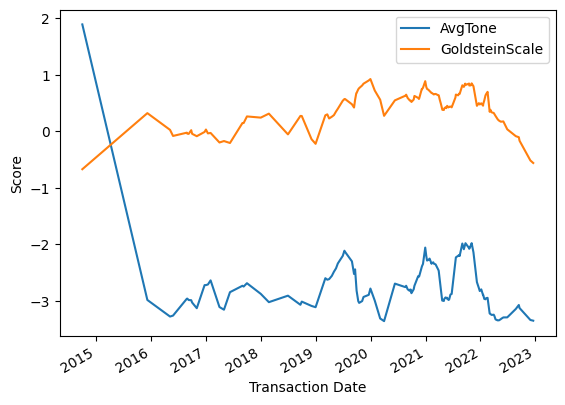

In [127]:
sub_df.plot(x='Transaction Date', y=['AvgTone', 'GoldsteinScale'], ylabel="Score", kind='line')

In [105]:
model = smf.ols(formula='DA ~ NumMentions',data=sub_df)

In [99]:
ukr_rus_conflict_df.to_csv('god_save_us.csv')

In [ ]:
ukr_rus_conflict_df.to_csv('god_save_us2.csv')

In [106]:
results = model.fit()

In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DA   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     11.64
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           4.36e-07
Time:                        21:34:03   Log-Likelihood:                -3460.9
No. Observations:                 213   AIC:                             6930.
Df Residuals:                     209   BIC:                             6943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.945e+06   1.85e+06      1.052      0.294    -1.7e+06    5.59e+06
AvgTone               5.59e+05   6.57e+05      0.850      0.396   -7.37e+05    1.85e+06
NumMentions             0.9180      0.990      0.927      0.355      -1.034       2.870
AvgTone:NumMentions     0.2438      0.315      0.773      0.440      -0.378       0.865
==============================================================================
Omnibus:                      261.264   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14131.556
Skew:                           5.122   Prob(JB):                         0.00
Kurtosis:                      41.566   Cond. No.                     7.30e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model2 = smf.ols(formula='DA ~ GoldsteinScale * NumMentions',data=sub_df)

In [109]:
results2 = model2.fit()

In [110]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DA   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     7.742
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.29e-05
Time:                        21:34:21   Log-Likelihood:                -3466.2
No. Observations:                 213   AIC:                             6940.
Df Residuals:                     209   BIC:                             6954.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3.698e+05   3.94e+05      0.939      0.349   -4.07e+05    1.15e+06
GoldsteinScale              8.748e+05   8.75e+05      1.000      0.319    -8.5e+05     2.6e+06
NumMentions                    0.5554      0.179      3.108      0.002       0.203       0.908
GoldsteinScale:NumMentions    -2.0893      0.592     -3.529      0.001      -3.257      -0.922
==============================================================================
Omnibus:                      294.158   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22187.476
Skew:                           6.177   Prob(JB):                         0.00
Kurtosis:                      51.450   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import pandas as pd
from datetime import timedelta

us_ukr_conf_aid.reset_index()

sub_df2 = pd.DataFrame(columns = ['AvgTone', 'WeightedTone', 'GoldsteinScale', 'WeightedGoldstein', 'NumMentions', 'NumArticles'])

for index, row in us_ukr_conf_aid.iterrows():
    t_date = row['Transaction Date']
    sub_df2.loc[len(sub_df2)] = ukr_rus_conflict_df[(ukr_rus_conflict_df['DATE'] < t_date) & (ukr_rus_conflict_df['DATE'] > t_date - timedelta(days=90))].agg({'AvgTone': 'sum', 'WeightedTone': 'sum', 'GoldsteinScale': 'sum', 'WeightedGoldstein': 'sum', 'NumMentions': 'sum', 'NumArticles': 'sum'})


# sub_df['Transaction Date'] = us_ukr_conf_aid['Transaction Date']
# sub_df['Dollar Amount'] = us_ukr_conf_aid['Constant Dollar Amount']


In [ ]:
sub_df2['Transaction Date'] = pd.Series()
sub_df2['Dollar Amount'] = pd.Series()

i = 0
for index, row in us_ukr_conf_aid.iterrows():
    t_date = row['Transaction Date']
    d_amount = row['Constant Dollar Amount']
    sub_df2.at[i, 'Transaction Date'] = t_date
    sub_df2.at[i, 'Dollar Amount'] = d_amount
    i += 1

sub_df2['DA'] = sub_df2['Dollar Amount'].astype(float)




In [ ]:
model3 = smf.ols(formula='DA ~ AvgTone * NumMentions + NumMentions*GoldsteinScale',data=sub_df2)

In [ ]:
results3 = model3.fit()

In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DA   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.998
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           3.32e-05
Time:                        20:09:52   Log-Likelihood:                -3463.0
No. Observations:                 213   AIC:                             6938.
Df Residuals:                     207   BIC:                             6958.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    1.05e+06   2.75e+05      3.819      0.000    5.08e+05    1.59e+06
AvgTone                       66.2165     12.686      5.220      0.000      41.207      91.226
NumMentions                   13.4680      2.918      4.615      0.000       7.715      19.221
AvgTone:NumMentions         4.201e-07   4.61e-06      0.091      0.927   -8.66e-06     9.5e-06
GoldsteinScale               -55.1934     44.391     -1.243      0.215    -142.710      32.323
NumMentions:GoldsteinScale  5.973e-06   5.52e-05      0.108      0.914      -0.000       0.000
==============================================================================
Omnibus:                      276.161   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17329.008
Skew:                           5.585   Prob(JB):                         0.00
Kurtosis:                      45.753   Cond. No.                     1.94e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
us_ukr_conf_aid

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
2483615,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,2,STATE,...,2,Obligations,2021,2021-06-03,10510548,11238798,8,Project-type interventions - not Investment Re...,.,2193
2483616,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,2,STATE,...,3,Disbursements,2021,2021-06-07,10510548,11238798,8,Project-type interventions - not Investment Re...,.,2195
2483617,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,2,STATE,...,2,Obligations,2021,2021-08-12,3800305,4063619,8,Project-type interventions - not Investment Re...,.,2231
2483618,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,2,STATE,...,3,Disbursements,2021,2021-08-16,3800305,4063619,8,Project-type interventions - not Investment Re...,.,2234
2483619,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,2,STATE,...,2,Obligations,2021,2021-04-22,5000,5346,8,Project-type interventions - not Investment Re...,.,2164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489589,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,13,DOE,...,3,Disbursements,2014,2014-09-30,144407,175195,8,Project-type interventions - not Investment Re...,.,1400
2489593,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,13,DOE,...,3,Disbursements,2014,2014-09-30,40391,49002,8,Project-type interventions - not Investment Re...,.,1404
2489597,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,13,DOE,...,3,Disbursements,2014,2014-09-30,1168711,1417878,8,Project-type interventions - not Investment Re...,.,1407
2489603,804,UKR,Ukraine,2,Europe and Eurasia,2.0,Lower Middle Income Country,LMIC,13,DOE,...,3,Disbursements,2014,2014-09-30,24934819,30250884,8,Project-type interventions - not Investment Re...,.,1414
